# 1. Install and Import Dependencies

In [1]:
!pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
  Using cached Pillow-8.4.0-cp38-cp38-win_amd64.whl (3.2 MB)


In [2]:
!pip list

Package             Version
------------------- -----------
argon2-cffi         21.1.0
attrs               21.2.0
backcall            0.2.0
bleach              4.1.0
cffi                1.15.0
colorama            0.4.4
debugpy             1.5.1
decorator           5.1.0
defusedxml          0.7.1
entrypoints         0.3
importlib-resources 5.4.0
ipykernel           6.5.0
ipython             7.29.0
ipython-genutils    0.2.0
ipywidgets          7.6.5
jedi                0.18.0
Jinja2              3.0.3
jsonschema          4.2.1
jupyter             1.0.0
jupyter-client      7.0.6
jupyter-console     6.4.0
jupyter-core        4.9.1
jupyterlab-pygments 0.1.2
jupyterlab-widgets  1.0.2
MarkupSafe          2.0.1
matplotlib-inline   0.1.3
mistune             0.8.4
nbclient            0.5.5
nbconvert           6.2.0
nbformat            5.1.3
nest-asyncio        1.5.1
notebook            6.4.5
numpy               1.21.4
packaging           21.2
pandocfilters       1.5.0
parso               0.8.2
p

In [3]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [4]:
!cd yolov5 & pip install -r requirements.txt

  Using cached matplotlib-3.4.3-cp38-cp38-win_amd64.whl (7.1 MB)
  Using cached opencv_python-4.5.4.58-cp38-cp38-win_amd64.whl (35.1 MB)
  Using cached PyYAML-6.0-cp38-cp38-win_amd64.whl (155 kB)
  Using cached requests-2.26.0-py2.py3-none-any.whl (62 kB)
  Using cached scipy-1.7.2-cp38-cp38-win_amd64.whl (34.2 MB)
  Using cached tqdm-4.62.3-py2.py3-none-any.whl (76 kB)
  Using cached tensorboard-2.7.0-py3-none-any.whl (5.8 MB)
  Using cached pandas-1.3.4-cp38-cp38-win_amd64.whl (10.2 MB)
  Using cached kiwisolver-1.3.2-cp38-cp38-win_amd64.whl (52 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached urllib3-1.26.7-py2.py3-none-any.whl (138 kB)
  Using cached idna-3.3-py3-none-any.whl (61 kB)
  Using cached charset_normalizer-2.0.7-py3-none-any.whl (38 kB)
  Using cached certifi-2021.10.8-py2.py3-none-any.whl (149 kB)
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB)
  Using cached absl_py-0.15.0-py3-none-any.whl (132 kB)
  Using cached google_auth-2.3.3-py2.py

In [9]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [10]:
torch.cuda.is_available()

True

In [11]:
# torch.cuda.current_device()
# torch.cuda.device(0)
torch.cuda.device_count()
# torch.cuda.get_device_name(0)

3

# 2. Load Model

In [17]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\user/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2021-11-10 torch 1.7.1+cu110 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [18]:
model

AutoShape(
  (model): Model(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C3(
        (cv1): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv3): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): Sequential(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (co

3. Make Detections

In [20]:
img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'

In [22]:
results = model(img)
results.print()

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x00000164BD49C400>

In [23]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

NameError: name 'results' is not defined

In [21]:
results.render()

[array([[[251, 216, 174],
         [254, 220, 175],
         [246, 213, 168],
         ...,
         [127, 149, 146],
         [ 67,  79,  55],
         [ 64,  70,  34]],
 
        [[235, 201, 156],
         [233, 200, 155],
         [221, 189, 142],
         ...,
         [120, 142, 140],
         [ 82,  92,  67],
         [ 46,  52,  16]],
 
        [[252, 220, 171],
         [245, 213, 164],
         [212, 180, 131],
         ...,
         [135, 155, 154],
         [ 66,  74,  50],
         [ 58,  62,  25]],
 
        ...,
 
        [[ 61,  69,  80],
         [ 64,  72,  83],
         [ 61,  69,  80],
         ...,
         [ 47,  52,  56],
         [ 48,  53,  57],
         [ 49,  54,  58]],
 
        [[ 56,  64,  75],
         [ 72,  80,  91],
         [ 70,  78,  89],
         ...,
         [ 48,  53,  57],
         [ 48,  53,  57],
         [ 50,  55,  59]],
 
        [[ 64,  72,  83],
         [ 76,  84,  95],
         [ 63,  71,  82],
         ...,
         [ 49,  54,  58],
  

# 4. Real Time Detections

In [22]:
cap = cv2.VideoCapture('traffic.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [12]:
import uuid   # Unique identifier
import os
import time

In [13]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['crop', 'weed']
# number_imgs = 5

In [ ]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [ ]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

In [ ]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

In [24]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [25]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [20]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

wandb: Currently logged in as: deekshitha (use `wandb login --relogin` to force relogin)
train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
From https://github.com/ultralytics/yolov5
   6903251..def7a0f  master     -> origin/master
   c8aad2f..032673f  tests/aws  -> origin/tests/aws
YOLOv5  2021-11-10 torch 1.7.1+cu110 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr

github:  YOLOv5 is out of date by 5 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.

Plotting labels... 

autoanchor: Analyzing anchors... anchors/target = 4.52, Best Possible Recall (BPR) = 1.0000
Optimizer stripped from runs\train\exp4\weights\last.pt, 14.3MB
Optimizer stripped from runs\train\exp4\weights\best.pt, 14.3MB



    14/499     1.23G    0.0407   0.01997  0.005593        55       320:  88%|########7 | 72/82 [00:07<00:01,  9.44it/s]
    14/499     1.23G    0.0407   0.01997  0.005593        55       320:  89%|########9 | 73/82 [00:07<00:00,  9.48it/s]
    14/499     1.23G   0.04077   0.01996  0.005553        51       320:  89%|########9 | 73/82 [00:07<00:00,  9.48it/s]
    14/499     1.23G   0.04077   0.01996  0.005553        51       320:  90%|######### | 74/82 [00:07<00:00,  8.97it/s]
    14/499     1.23G   0.04076   0.01993  0.005502        60       320:  90%|######### | 74/82 [00:07<00:00,  8.97it/s]
    14/499     1.23G   0.04069   0.01986  0.005467        40       320:  90%|######### | 74/82 [00:07<00:00,  8.97it/s]
    14/499     1.23G   0.04069   0.01986  0.005467        40       320:  93%|#########2| 76/82 [00:07<00:00,  9.48it/s]
    14/499     1.23G   0.04062   0.01983  0.005431        44       320:  93%|#########2| 76/82 [00:07<00:00,  9.48it/s]
    14/499     1.23G   0.04062   0.01983

    35/499     1.23G   0.03366   0.01729  0.004673        50       320:  32%|###1      | 26/82 [00:02<00:05,  9.57it/s]
    35/499     1.23G   0.03366   0.01729  0.004673        50       320:  33%|###2      | 27/82 [00:02<00:05,  9.56it/s]
    35/499     1.23G   0.03362    0.0173   0.00467        54       320:  33%|###2      | 27/82 [00:02<00:05,  9.56it/s]
    35/499     1.23G   0.03362    0.0173   0.00467        54       320:  34%|###4      | 28/82 [00:02<00:06,  8.98it/s]
    35/499     1.23G   0.03347   0.01721  0.004652        44       320:  34%|###4      | 28/82 [00:02<00:06,  8.98it/s]
    35/499     1.23G   0.03343   0.01723    0.0046        47       320:  34%|###4      | 28/82 [00:02<00:06,  8.98it/s]
    35/499     1.23G   0.03343   0.01723    0.0046        47       320:  37%|###6      | 30/82 [00:02<00:05,  9.52it/s]
    35/499     1.23G   0.03349   0.01742  0.004531        63       320:  37%|###6      | 30/82 [00:03<00:05,  9.52it/s]
    35/499     1.23G   0.03349   0.01742

    55/499     1.23G   0.03169    0.0175  0.004221        48       320:  76%|#######5  | 62/82 [00:06<00:02,  9.35it/s]
    55/499     1.23G   0.03169    0.0175  0.004221        48       320:  77%|#######6  | 63/82 [00:06<00:02,  9.39it/s]
    55/499     1.23G    0.0316   0.01751   0.00422        53       320:  77%|#######6  | 63/82 [00:06<00:02,  9.39it/s]
    55/499     1.23G    0.0316   0.01751   0.00422        53       320:  78%|#######8  | 64/82 [00:06<00:02,  8.91it/s]
    55/499     1.23G   0.03166    0.0175  0.004191        53       320:  78%|#######8  | 64/82 [00:06<00:02,  8.91it/s]
    55/499     1.23G   0.03165   0.01747  0.004161        49       320:  78%|#######8  | 64/82 [00:06<00:02,  8.91it/s]
    55/499     1.23G   0.03165   0.01747  0.004161        49       320:  80%|########  | 66/82 [00:06<00:01,  9.47it/s]
    55/499     1.23G   0.03155   0.01743  0.004124        42       320:  80%|########  | 66/82 [00:06<00:01,  9.47it/s]
    55/499     1.23G   0.03155   0.01743

    76/499     1.23G   0.03035   0.01723  0.003378        59       320:  84%|########4 | 69/82 [00:07<00:01,  9.40it/s]
    76/499     1.23G   0.03035   0.01723  0.003378        59       320:  85%|########5 | 70/82 [00:07<00:01,  9.34it/s]
    76/499     1.23G   0.03042   0.01717   0.00335        47       320:  85%|########5 | 70/82 [00:07<00:01,  9.34it/s]
    76/499     1.23G   0.03042   0.01717   0.00335        47       320:  87%|########6 | 71/82 [00:07<00:01,  9.43it/s]
    76/499     1.23G   0.03044   0.01724  0.003317        62       320:  87%|########6 | 71/82 [00:07<00:01,  9.43it/s]
    76/499     1.23G   0.03048   0.01727  0.003357        63       320:  87%|########6 | 71/82 [00:07<00:01,  9.43it/s]
    76/499     1.23G   0.03048   0.01727  0.003357        63       320:  89%|########9 | 73/82 [00:07<00:00,  9.36it/s]
    76/499     1.23G   0.03046   0.01727  0.003336        53       320:  89%|########9 | 73/82 [00:07<00:00,  9.36it/s]
    76/499     1.23G   0.03046   0.01727

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  22%|##1       | 9/41 [00:01<00:04,  7.63it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  24%|##4       | 10/41 [00:01<00:04,  7.61it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  27%|##6       | 11/41 [00:01<00:03,  7.58it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  29%|##9       | 12/41 [00:01<00:03,  7.58it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  32%|###1      | 13/41 [00:01<00:03,  7.56it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  34%|###4      | 14/41 [00:01<00:03,  7.53it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  37%|###6      | 15/41 [00:01<00:03,  7.51it/s]
               Class     Images     Labels       

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)


               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  32%|###1      | 13/41 [00:01<00:03,  8.03it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  34%|###4      | 14/41 [00:01<00:03,  8.08it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  37%|###6      | 15/41 [00:01<00:03,  8.06it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  39%|###9      | 16/41 [00:02<00:03,  7.96it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  41%|####1     | 17/41 [00:02<00:03,  7

   379/499     1.23G   0.02139   0.01399  0.001471        65       320:  60%|#####9    | 49/82 [00:05<00:03,  9.33it/s]
   379/499     1.23G   0.02141   0.01395   0.00146        50       320:  60%|#####9    | 49/82 [00:05<00:03,  9.33it/s]
   379/499     1.23G   0.02141   0.01395   0.00146        50       320:  62%|######2   | 51/82 [00:05<00:03,  9.34it/s]
   379/499     1.23G   0.02143     0.014  0.001503        68       320:  62%|######2   | 51/82 [00:05<00:03,  9.34it/s]
   379/499     1.23G   0.02143     0.014  0.001503        68       320:  63%|######3   | 52/82 [00:05<00:03,  9.28it/s]
   379/499     1.23G   0.02137   0.01393  0.001479        42       320:  63%|######3   | 52/82 [00:05<00:03,  9.28it/s]
   379/499     1.23G   0.02137   0.01393  0.001479        42       320:  65%|######4   | 53/82 [00:05<00:03,  9.36it/s]
   379/499     1.23G   0.02136   0.01385  0.001478        41       320:  65%|######4   | 53/82 [00:05<00:03,  9.36it/s]
   379/499     1.23G   0.02136   0.01385

   402/499     1.23G   0.02289   0.01432  0.001172        64       320:  17%|#7        | 14/82 [00:01<00:06,  9.72it/s]
   402/499     1.23G   0.02285   0.01457  0.001181        73       320:  17%|#7        | 14/82 [00:01<00:06,  9.72it/s]
   402/499     1.23G   0.02285   0.01457  0.001181        73       320:  20%|#9        | 16/82 [00:01<00:06,  9.81it/s]
   402/499     1.23G   0.02278    0.0144  0.001193        45       320:  20%|#9        | 16/82 [00:01<00:06,  9.81it/s]
   402/499     1.23G   0.02281   0.01432  0.001157        46       320:  20%|#9        | 16/82 [00:01<00:06,  9.81it/s]
   402/499     1.23G   0.02281   0.01432  0.001157        46       320:  22%|##1       | 18/82 [00:01<00:06,  9.33it/s]
   402/499     1.23G   0.02266   0.01433  0.001186        63       320:  22%|##1       | 18/82 [00:01<00:06,  9.33it/s]
   402/499     1.23G   0.02266   0.01433  0.001186        63       320:  23%|##3       | 19/82 [00:01<00:07,  9.00it/s]
   402/499     1.23G   0.02256   0.01422

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  10%|9         | 4/41 [00:00<00:07,  4.90it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  12%|#2        | 5/41 [00:01<00:07,  4.86it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  15%|#4        | 6/41 [00:01<00:07,  4.84it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  17%|#7        | 7/41 [00:01<00:06,  4.86it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  20%|#9        | 8/41 [00:01<00:06,  4.90it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  22%|##1       | 9/41 [00:01<00:06,  4.81it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  24%|##4       | 10/41 [00:01<00:05,  5.40it/s]
               Class     Images     Labels          P 

   444/499     1.23G   0.02066   0.01327  0.001616         8       320: 100%|##########| 82/82 [00:09<00:00,  9.03it/s]

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/41 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   2%|2         | 1/41 [00:00<00:08,  4.88it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   5%|4         | 2/41 [00:00<00:08,  4.81it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   7%|7         | 3/41 [00:00<00:07,  4.86it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  10%|9         | 4/41 [00:00<00:07,  4.89it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  12%|#2        | 5/41 [00:01<00:07,  4.87it/s]
               Class     Images     Labels          P          R     mAP@.5 m

   464/499     1.23G   0.02023   0.01285  0.001306        59       320:  88%|########7 | 72/82 [00:08<00:01,  8.93it/s]
   464/499     1.23G   0.02023   0.01285  0.001306        59       320:  90%|######### | 74/82 [00:08<00:00,  8.53it/s]
   464/499     1.23G   0.02021   0.01282  0.001297        40       320:  90%|######### | 74/82 [00:08<00:00,  8.53it/s]
   464/499     1.23G   0.02019   0.01274  0.001288        31       320:  90%|######### | 74/82 [00:08<00:00,  8.53it/s]
   464/499     1.23G   0.02019   0.01274  0.001288        31       320:  93%|#########2| 76/82 [00:08<00:00,  8.85it/s]
   464/499     1.23G   0.02018   0.01276  0.001275        57       320:  93%|#########2| 76/82 [00:08<00:00,  8.85it/s]
   464/499     1.23G   0.02022   0.01279  0.001274        63       320:  93%|#########2| 76/82 [00:08<00:00,  8.85it/s]
   464/499     1.23G   0.02022   0.01279  0.001274        63       320:  95%|#########5| 78/82 [00:08<00:00,  8.64it/s]
   464/499     1.23G   0.02022   0.01276

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  39%|###9      | 16/41 [00:03<00:05,  4.88it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



^C


In [16]:
pip install wandb

Note: you may need to restart the kernel to use updated packages.


In [19]:
import wandb
!wandb login --relogin


wandb: ERROR Find detailed error logs at: C:\Users\user\AppData\Local\Temp\debug-cli.log
Error: api_key not configured (no-tty). call wandb login [your_api_key]


# 6. Load Custom Model

In [30]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp4/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\user/.cache\torch\hub\master.zip
YOLOv5  2021-11-12 torch 1.7.1+cu110 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)

Fusing layers... 
Model Summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [38]:
img = os.path.join('data', 'images', 'agri_0_14.jpeg')

In [39]:
results = model(img)

In [40]:
results.print()

image 1/1: 512x512 18 crops
Speed: 12.0ms pre-process, 12.0ms inference, 14.0ms NMS per image at shape (1, 3, 640, 640)


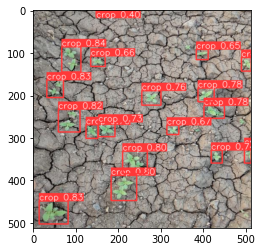

In [41]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [15]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()